Your first requirement is to create a series of scatter plots to showcase the following relationships:

Temperature (F) vs. Latitude
Humidity (%) vs. Latitude
Cloudiness (%) vs. Latitude
Wind Speed (mph) vs. Latitude

After each plot add a sentence or too explaining what the code is and analyzing.

^do I want average temperature, humidity, cloudiness, wind speed versus latitude???

Notes - latitude ranges from -90 to 90, longitude ranges from -180 to 180 - do I just get random data points from the API...??? Random lat & longitude combos wouldn't work because that's not necessarily a city

In [60]:
 # Dependencies
import requests
import json
import random
from citipy import citipy
import numpy as np
import matplotlib.pyplot as plt
from config import api_key
import pandas as pd
import scipy.stats as st

In [4]:
#generate random list for latitudes and longitudes in excess of 500 - will need more 

latitude = []
longitude = []

for each_lat in np.random.randint(-90,90,2000):
    latitude.append(each_lat)

for each_lon in np.random.randint(-180,180,2000):
    longitude.append(each_lon)

In [5]:
#Combine latitude and longitude into one tuple

coordinates = tuple(zip(latitude,longitude))

In [6]:
#use citipy library to find the nearest city for all latitudes and longitudes

cities = []
country = []

for lat,lon in coordinates:
    city = citipy.nearest_city(lat,lon)
    
    cityName = city.city_name
    
    cities.append(cityName)
    
    country.append(city.country_code)

In [7]:
#Remove duplicates
cities=list(set(cities))
len(cities)

754

In [8]:
# Create lists to hold city data
lat=[]
lon=[]
temps=[]
humidity=[]
cloudiness=[]
wind_speed=[]

#Loop through cities to request data and write to lists
for city in cities:
    
    city_name=city
    url=f'http://api.openweathermap.org/data/2.5/weather?q={city_name}&units=IMPERIAL&appid={api_key}'
    response = requests.get(url).json()
#    print(f'City name is {city_name}')
    
    try:
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        temps.append(response['main']['temp'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        
    except KeyError:
        lat.append(np.nan)
        lon.append(np.nan)
        temps.append(np.nan)
        humidity.append(np.nan)
        cloudiness.append(np.nan)
        wind_speed.append(np.nan)
        
#        print('Missing information - skipped ')
        
#    print(f"The {city} temperate is {(response['main']['temp'])}, with {response['main']['humidity']}% humidity, {response['clouds']['all']}% cloudiness, and {response['wind']['speed']}mph winds")

In [50]:
#Write lists to data frame
cities_complete = pd.DataFrame(data={"City Name": cities, "Latitude": lat, "Longitude": lon, 
                                         "Temperature": temps, "Humidity": humidity, "Cloudiness": cloudiness, "Wind Speed": wind_speed})

#Drop empty rows
cities_complete = cities_complete.dropna()

#Write data frae to csv
cities_complete.to_csv("./citydata.csv", sep=',',index=False)

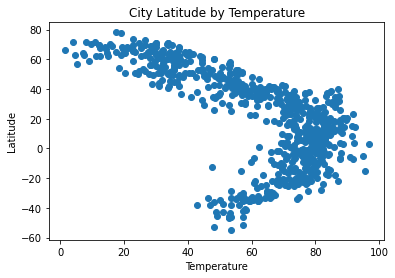

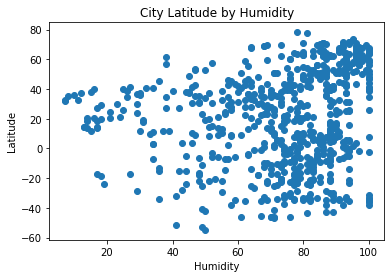

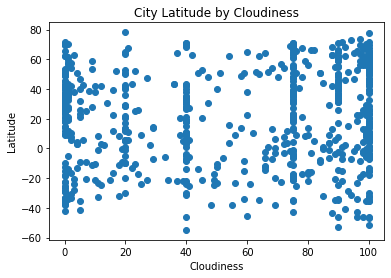

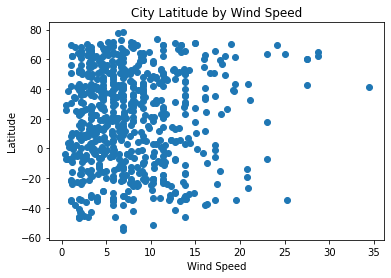

In [51]:
city_data={'Temperature': cities_complete['Temperature'], 'Humidity':  cities_complete['Humidity'], 
           'Cloudiness':  cities_complete['Cloudiness'], 'Wind Speed':  cities_complete['Wind Speed']}

for key, value in city_data.items():
    #Clear plot
    plt.cla()
    
    #Create scatter plots
    title=f"{key} by Latitude Scatter"
    fig_title=f"{value}_scatter"
    fig_title=plt.scatter(value, cities_complete['Latitude'], marker="o")
    
    #Incorporate the other graph properties
    plt.title(f"City Latitude by {key}")
    plt.xlabel(key)
    plt.ylabel("Latitude")

    #Save the figure as PNG
    plt.savefig(f"{title}.png")

    #Show plot
    plt.show()

In [55]:
#Create subsets for northern and souther hemispheres
northern_cities=cities_complete.loc[(cities_complete['Latitude'] > 0)]
southern_cities=cities_complete.loc[(cities_complete['Latitude'] < 0)]

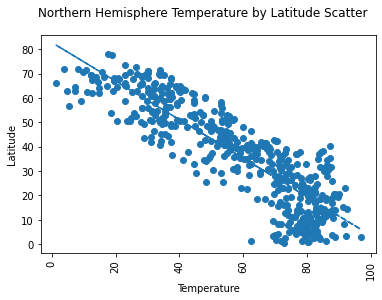

The correlation coefficient between Northern Hemisphere Temperature and latitude is -0.88


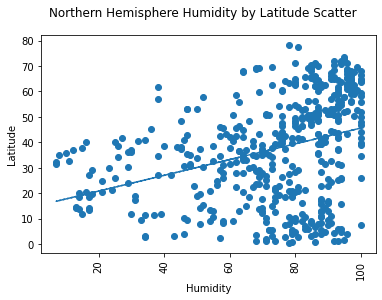

The correlation coefficient between Northern Hemisphere Humidity and latitude is 0.33


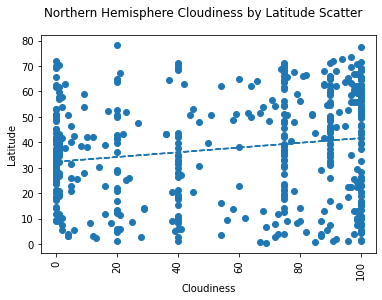

The correlation coefficient between Northern Hemisphere Cloudiness and latitude is 0.18


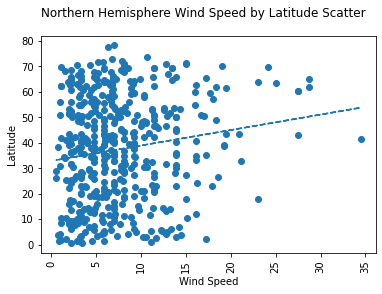

The correlation coefficient between Northern Hemisphere Wind Speed and latitude is 0.15


In [84]:
northern_data={'Temperature': northern_cities['Temperature'], 'Humidity':  northern_cities['Humidity'], 
           'Cloudiness':  northern_cities['Cloudiness'], 'Wind Speed':  northern_cities['Wind Speed']}

for key, value in northern_data.items():
    #Clear plot
    plt.cla()
    
    #Complete linear regression
    slope, city_int, r, p, std_err = st.linregress(northern_cities[key], northern_cities['Latitude'])

    # Create equation of line to calculate predicted violent crime rate
    city_fit = slope * northern_cities[key] + city_int
    
    #Create scatter plots
    title=f"Northern Hemisphere {key} by Latitude Scatter"
    plt.scatter(northern_cities[key], northern_cities['Latitude'])
    plt.plot(northern_cities[key], city_fit,"--")
    plt.xticks(rotation=90)
    plt.suptitle(title)
    plt.xlabel(key)
    plt.ylabel('Latitude')

    #Save the figure as PNG
    plt.savefig(f"{title}.png")

    #Show plot
    plt.show()
    print(f"The correlation coefficient between Northern Hemisphere {key} and latitude is {round(st.pearsonr(northern_cities[key], northern_cities['Latitude'])[0],2)}")

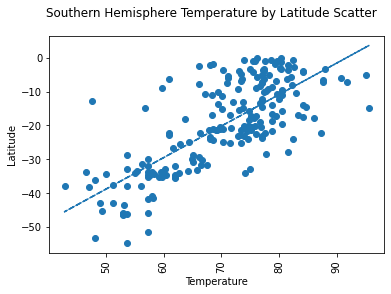

The correlation coefficient between Southern Hemisphere Temperature and latitude is 0.75


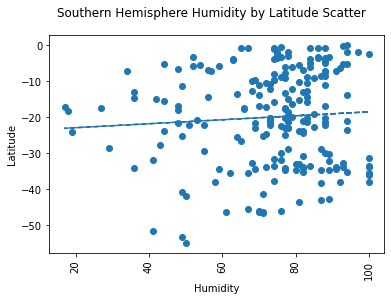

The correlation coefficient between Southern Hemisphere Humidity and latitude is 0.07


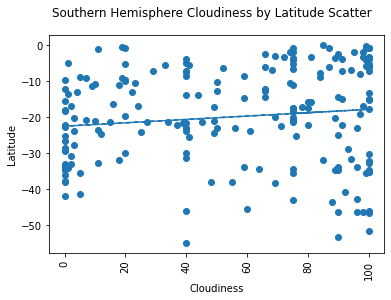

The correlation coefficient between Southern Hemisphere Cloudiness and latitude is 0.13


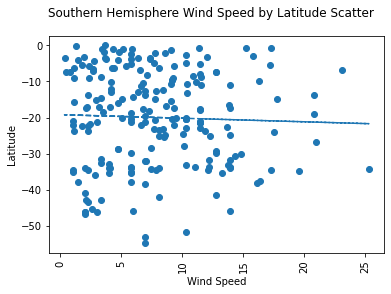

The correlation coefficient between Southern Hemisphere Wind Speed and latitude is -0.04


In [83]:
southern_data={'Temperature': southern_cities['Temperature'], 'Humidity':  southern_cities['Humidity'], 
           'Cloudiness':  southern_cities['Cloudiness'], 'Wind Speed':  southern_cities['Wind Speed']}

for key, value in southern_data.items():
    #Clear plot
    plt.cla()
    
    #Complete linear regression
    slope, city_int, r, p, std_err = st.linregress(southern_cities[key], southern_cities['Latitude'])

    # Create equation of line to calculate predicted violent crime rate
    city_fit = slope * southern_cities[key] + city_int
    
    #Create scatter plots
    title=f"Southern Hemisphere {key} by Latitude Scatter"
    plt.scatter(southern_cities[key], southern_cities['Latitude'])
    plt.plot(southern_cities[key], city_fit,"--")
    plt.xticks(rotation=90)
    plt.suptitle(title)
    plt.xlabel(key)
    plt.ylabel('Latitude')

    #Save the figure as PNG
    plt.savefig(f"{title}.png")

    #Show plot
    plt.show()
    print(f"The correlation coefficient between Southern Hemisphere {key} and latitude is {round(st.pearsonr(southern_cities[key], southern_cities['Latitude'])[0],2)}")